* Student name: WILLIAM OMONDI NDONI
* Student pace:  full time 

## Business Understanding
WON Real Estate Limited is a real estate company located in the American Northwest that buys and sells houses to its clients. The company would like to develop a model that can estimate the price of a house based on its features. In addition,the company would like to know which features best estimate the house prices.

This project will help identify the features that can be used to provide a good estimate of the house prices.The project will also develop a model that can estimate the house prices and evaluate its performance.

## Data understanding
The data used in this project was obtained from [kaggle website](https://www.kaggle.com/datasets/shivachandel/kc-house-data). This dataset contains the prices of houses in the American Northwest and their various features such as,the number of bathrooms and the number of bedrooms.These are contained in the various columns of the dataset.

The dataset contains twenty one columns that are the features(characteristics) of the houses.The main aim of this project is to estimate the prices of houses that are contained in the 'price' column.
This dataset will therefore be of use since the company is also in the Northwest.

## Data Preparation

### Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set()

#### Loading and exploring the dataset

In [2]:
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
## Getting information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

 From the documentation provided on columns we can clearly identify columns such as waterfront,grade,condition and view as categorical.We will further investigate to identify whether there are other categorical columns

In [4]:
## Taking a look at the  sqft_basement column which is seen to be an object data type 
df['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [5]:
df['sqft_basement'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object>

In [6]:
df[df['sqft_basement']== '?']['sqft_basement'].count()

454

In [7]:
## Replacing ? with zero,considering those to be houses without a basement

In [8]:
df['sqft_basement'] = df['sqft_basement'].replace('?',0)
df[df['sqft_basement']== 0 ]['sqft_basement'].count()

454

In [9]:
## Converting the column to a float
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)
df['sqft_basement'].dtype

dtype('float64')

The date column is an object data type. Converting it to a datetime object would make it more useful to the model.

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [11]:
## Taking a look at the grade and condition columns
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [12]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [13]:
## Changing the grade column to only remain with strings ie removing the numbers
df['grade'] = df['grade'].map(lambda x: x[1:])
df['grade']

0             Average
1             Average
2         Low Average
3             Average
4                Good
             ...     
21592            Good
21593            Good
21594         Average
21595            Good
21596         Average
Name: grade, Length: 21597, dtype: object

In [14]:
## Stripping the spaces
df['grade'] = df['grade'].apply(lambda x: x.rstrip())
df['grade']

0             Average
1             Average
2         Low Average
3             Average
4                Good
             ...     
21592            Good
21593            Good
21594         Average
21595            Good
21596         Average
Name: grade, Length: 21597, dtype: object

### Dropping irrelevant columns

From the documentation it can be known that some columns will be irrelevant to our project. This is because the have no predictive power,for instance the zipcode,lat and long columns. A house buyer or seller doesn't look at the latitudes or longitudes in order to consider buying a house (in the case of buyer) or prizing a house(in the case of a seller).The year renovated will not be considered relevant, provided the condition of the house is in our model there will be no use of the yr_renovated column. In addition it has missing values.

This is the list of columns to be dropped since they are not  considered relevant to our model = `['zipcode','lat','long','yr_renovated']`

In [15]:
df_r = df.drop(['zipcode','lat','long','yr_renovated'],axis = 1)
print(df.shape)
df_r.head()


(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,Average,1180,0.0,1955,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,Average,2170,400.0,1951,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,Low Average,770,0.0,1933,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,Average,1050,910.0,1965,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,Good,1680,0.0,1987,1800,7503


### Dealing with missing values

In [16]:
df_r.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
## The waterfront and view columns have missing values both are categorical columns
## Taking a look at the view column
df_r['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Houses with no view ie NONE occur  the most. We can replace the missing values with NONE

In [18]:
## Replacing the missing values in the view column with NONE
df_r['view'].fillna('NONE',inplace = True)
df_r['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [19]:
## Taking a look at the waterfront column
df_r['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Dropping the rows with the missing values will not be a good idea since the number of missing values in the waterfront column is more than 2300. We will be removing more than 10% of our dataset. A rule of thumb is that we are not supposed to drop more than 5% of the entire dataset.Since houses with no waterfront occur the most it is more reasonable to replace the missing values with 'NO'. They will be considered as houses with no waterfront.

In [20]:
## Replacing the missing values in the waterfront column with NO
df_r['waterfront'].fillna('NO',inplace = True)
df_r['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [21]:
df_no_mv = df_r.copy()
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  sqft_living15  2159

### Dealing with duplicates

In order to identify duplicates we need to set the subset to the id and date columns. A house can be sold twice but not on the same date. Factors such as the condition/grade might have changed its price.

In [22]:
df_no_mv.duplicated(subset = ['id','date']).sum()

0

In [23]:
## The dataset has no missing values

In [24]:
## droping the id column
df_no_mv.drop('id',axis = 1,inplace = True)

### Exploring the distributions and dealing with outliers

Most often non normality in the variables is associated with non normality in the errors(residuals).We can ensure normality in our variables before modelling and still confirm afterwards.Outliers will also be delt with since they also affect the distributions of our variables. We will focus on removing more extreme outliers and therefore the distributions may not be completely normal. This will still help improve our model.

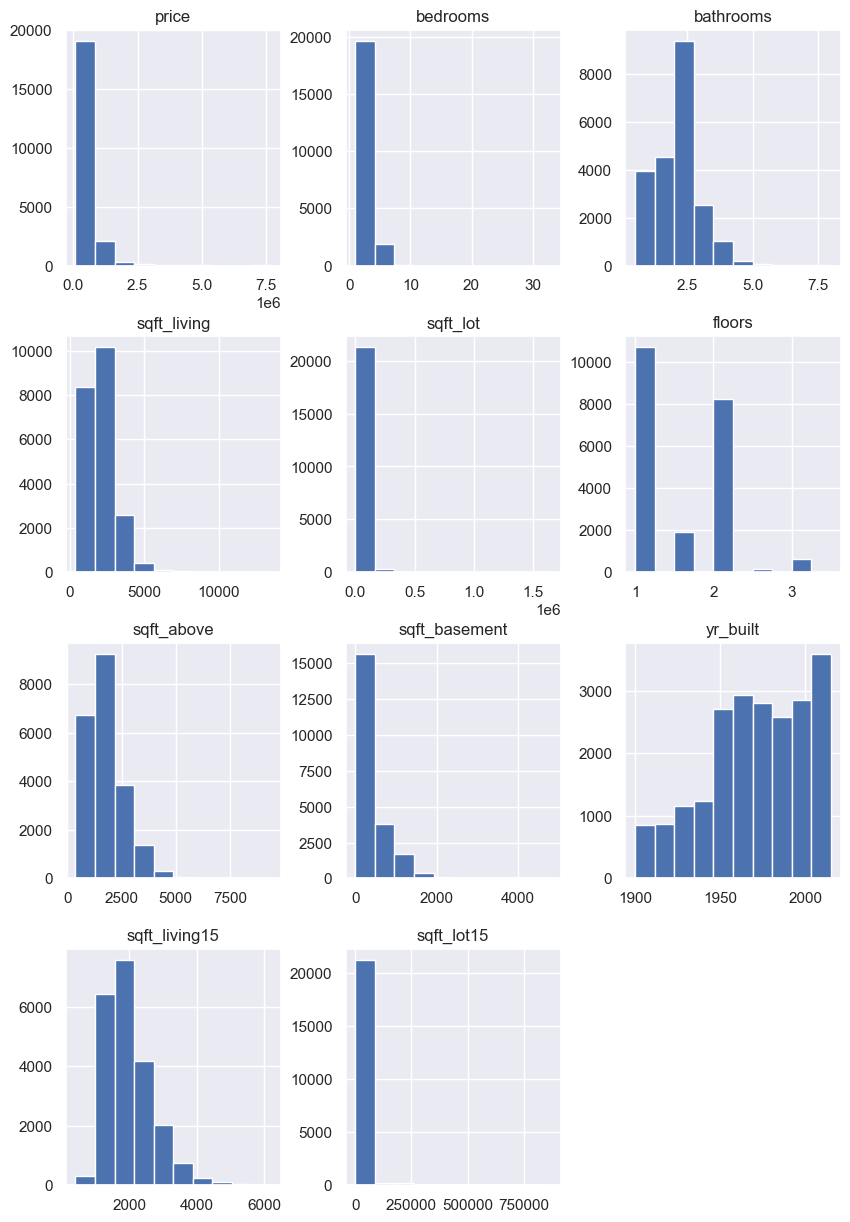

In [25]:
### creating histograms of the numerical columns
df_num = df_no_mv.select_dtypes('number')
df_num.hist(figsize = (10,15));

#### Dealing with the price column

In [26]:
## Exploring the descriptive statistics of price
df_no_mv['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Clearly the column has outliers.

In [30]:
## Calculating the formula that will be used to remove outliers
q1 = df_no_mv['price'].quantile(.25)
q3= df_no_mv['price'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
out

1129500.0

In [31]:
## Removing the outliers in price
q1 = df_no_mv['price'].quantile(.25)
q3= df_no_mv['price'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['price'] <= out]
df_no_mv['price'].describe()

count    2.043900e+04
mean     4.767026e+05
std      2.077903e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.375000e+05
75%      6.000000e+05
max      1.120000e+06
Name: price, dtype: float64

<Axes: >

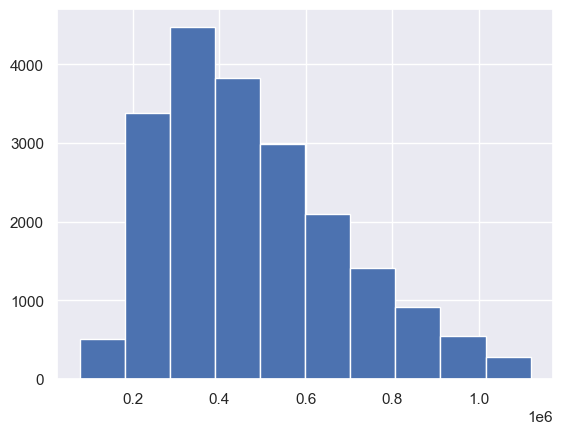

In [32]:
df_no_mv['price'].hist()

#### Dealing with the bedrooms,bathrooms and floors columns

We will consider these columns to be numerical. Having a high number of dummies makes it difficult to interpret the model. Also columns such as bedrooms can have varying values.

In [33]:
## Checking the bedrooms column
df_no_mv['bedrooms'].value_counts()

3     9597
4     6304
2     2736
5     1335
6      225
1      195
7       30
8        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [44]:
## Removing outliers in the bedrooms column
q1 = df_no_mv['bedrooms'].quantile(.25)
q3= df_no_mv['bedrooms'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['bedrooms']< out]
df_no_mv.bedrooms.describe()

count    20161.000000
mean         3.290164
std          0.817120
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedrooms, dtype: float64

In [41]:
# Having a  look at the floors column
df_no_mv['floors'].describe()

count    20167.000000
mean         1.474810
std          0.537067
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [43]:
## Removing outliers in the floors column
q1 = df_no_mv['floors'].quantile(.25)
q3= df_no_mv['floors'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['floors']< out]
df_no_mv.floors.describe()

count    20161.000000
mean         1.474208
std          0.536009
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: floors, dtype: float64

In [45]:
## Checking the bathrooms column
df_no_mv['bathrooms'].describe()

count    20161.000000
mean         2.039581
std          0.697911
min          0.500000
25%          1.500000
50%          2.000000
75%          2.500000
max          6.000000
Name: bathrooms, dtype: float64

In [46]:
## Removing outliers in the bathrooms column
q1 = df_no_mv['bathrooms'].quantile(.25)
q3= df_no_mv['bathrooms'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['bathrooms']< out]
df_no_mv.bathrooms.describe()

count    20033.000000
mean         2.025408
std          0.676643
min          0.500000
25%          1.500000
50%          2.000000
75%          2.500000
max          3.750000
Name: bathrooms, dtype: float64

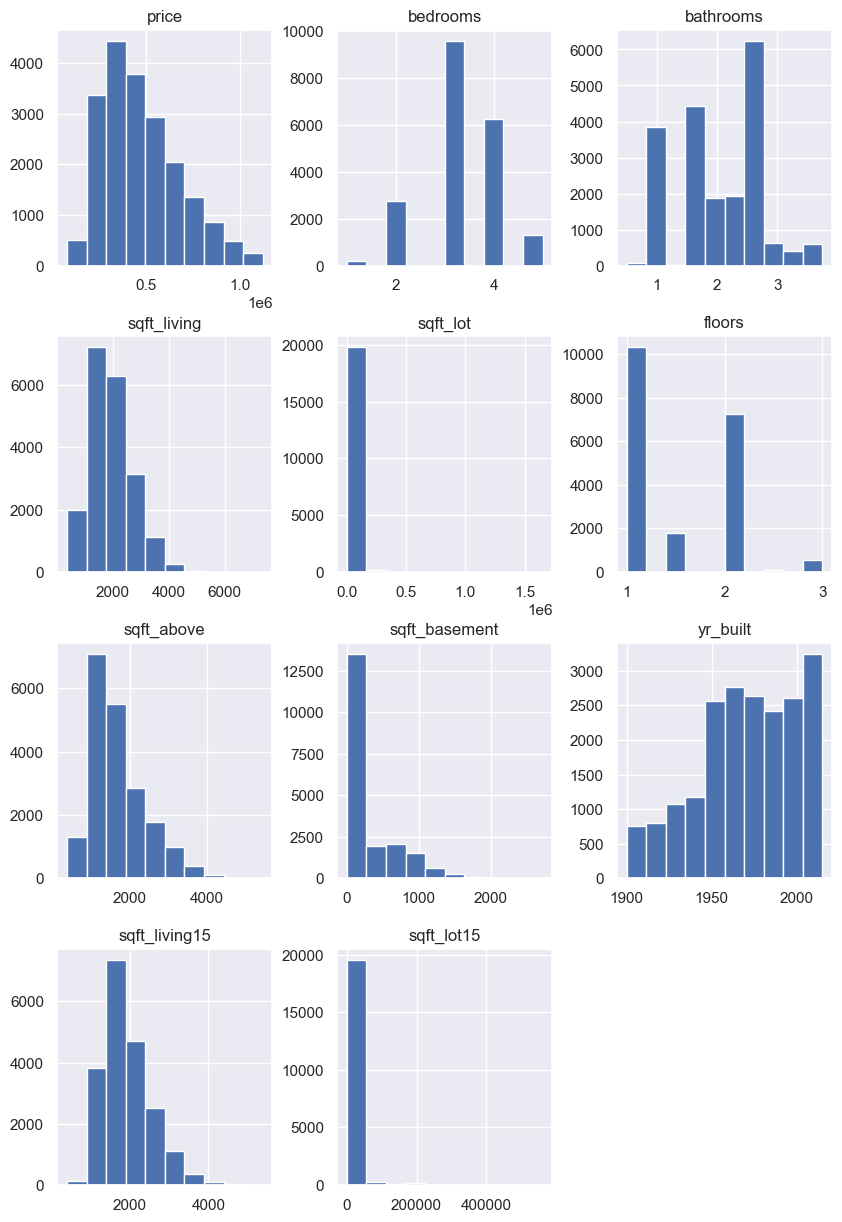

In [47]:
## Exploring the distributions of numerical columns in t df_no_mv
df_no_mv.select_dtypes('number').hist(figsize = (10,15));

In [48]:
## Taking a look at the descriptive statistics
df_no_mv.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.003300e+04,20033.000000,20033.000000,20033.000000,2.003300e+04,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000
mean,4.728285e+05,3.283682,2.025408,1949.456447,1.443158e+04,1.471297,1690.487645,253.679329,1970.811860,1913.295812,12323.977387
std,2.053360e+05,0.814053,0.676643,747.127780,3.942336e+04,0.535738,709.210408,396.605015,29.139213,606.217551,25616.344230
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.149500e+05,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,1170.000000,0.000000,1951.000000,1470.000000,5040.000000
50%,4.350000e+05,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,1510.000000,0.000000,1974.000000,1800.000000,7528.000000
75%,5.989920e+05,4.000000,2.500000,2400.000000,1.026000e+04,2.000000,2080.000000,500.000000,1996.000000,2270.000000,9840.000000
max,1.120000e+06,5.000000,3.750000,7350.000000,1.651359e+06,3.000000,5450.000000,2720.000000,2015.000000,5380.000000,560617.000000


In [49]:
## Removing the outliers in the sqft_living column
q1 = df_no_mv['sqft_living'].quantile(.25)
q3= df_no_mv['sqft_living'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_living']< out]
df_no_mv.sqft_living.describe()

count    19766.000000
mean      1917.803147
std        698.945596
min        370.000000
25%       1380.000000
50%       1830.000000
75%       2380.000000
max       3910.000000
Name: sqft_living, dtype: float64

<Axes: >

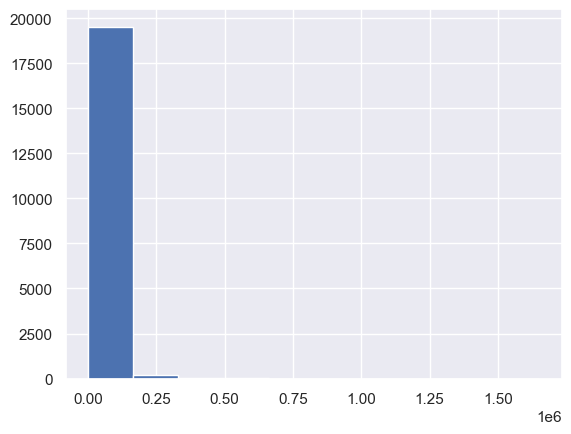

In [50]:
## Checking for outliers in the sqft_lot column
df_no_mv['sqft_lot'].hist()

In [51]:
## Removing the outliers in the sqft_lot column
q1 = df_no_mv['sqft_lot'].quantile(.25)
q3= df_no_mv['sqft_lot'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_lot']< out]
df_no_mv.sqft_lot.describe()

count    17693.000000
mean      7142.882100
std       3401.181982
min        520.000000
25%       4800.000000
50%       7133.000000
75%       9142.000000
max      17950.000000
Name: sqft_lot, dtype: float64

In [52]:
## Checking for outliers in the sqft_above column
df_no_mv['sqft_above'].describe()

count    17693.000000
mean      1616.607076
std        644.885750
min        370.000000
25%       1140.000000
50%       1450.000000
75%       1960.000000
max       3910.000000
Name: sqft_above, dtype: float64

In [53]:
## Removing outliers in the sqft_above column
q1 = df_no_mv['sqft_above'].quantile(.25)
q3= df_no_mv['sqft_above'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_above']< out]
df_no_mv.sqft_above.describe()

count    17201.000000
mean      1564.517586
std        573.673338
min        370.000000
25%       1140.000000
50%       1430.000000
75%       1900.000000
max       3181.000000
Name: sqft_above, dtype: float64

In [54]:
## Checking for outliers in the sqft_basement column
df_no_mv['sqft_basement'].describe()

count    17201.000000
mean       253.964711
std        383.358301
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       1990.000000
Name: sqft_basement, dtype: float64

<Axes: >

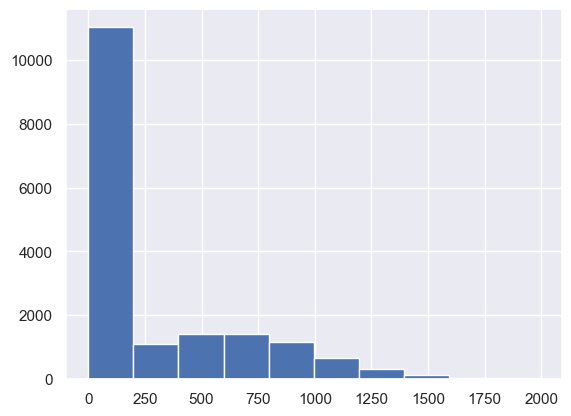

In [55]:
## Visualizing to see the outliers
df_no_mv['sqft_basement'].hist()

In [56]:
## Removing the outliers in the sqft_basement column
q1 = df_no_mv['sqft_basement'].quantile(.25)
q3= df_no_mv['sqft_basement'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_basement']< out]
df_no_mv.sqft_basement.describe()

count    16846.000000
mean       229.395940
std        346.830234
min          0.000000
25%          0.000000
50%          0.000000
75%        460.000000
max       1240.000000
Name: sqft_basement, dtype: float64

<Axes: >

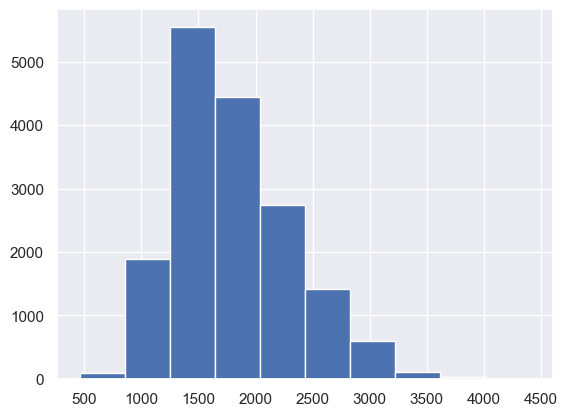

In [58]:
## Checking for outliers in the sqft_living15 column
df_no_mv['sqft_living15'].hist()

In [59]:
## Removing the outliers in the sqft_living15 column
q1 = df_no_mv['sqft_living15'].quantile(.25)
q3= df_no_mv['sqft_living15'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_living15']< out]
df_no_mv.sqft_living15.describe()

count    16646.000000
mean      1782.801093
std        486.943936
min        460.000000
25%       1420.000000
50%       1700.000000
75%       2090.000000
max       3140.000000
Name: sqft_living15, dtype: float64

<Axes: >

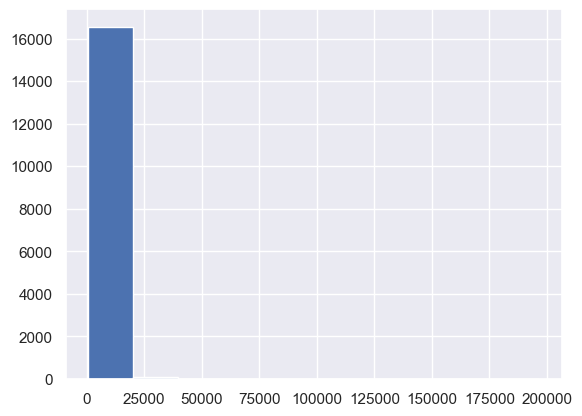

In [60]:
## Checking for outliers in the sqft_lot15 column
df_no_mv['sqft_lot15'].hist()

In [61]:
## Removing the outliers in the sqft_lot15 column
q1 = df_no_mv['sqft_lot15'].quantile(.25)
q3= df_no_mv['sqft_lot15'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_lot15']< out]
df_no_mv.sqft_lot15.describe()

count    16266.000000
mean      6752.069040
std       2828.229946
min        651.000000
25%       4764.000000
50%       7000.000000
75%       8592.000000
max      14679.000000
Name: sqft_lot15, dtype: float64

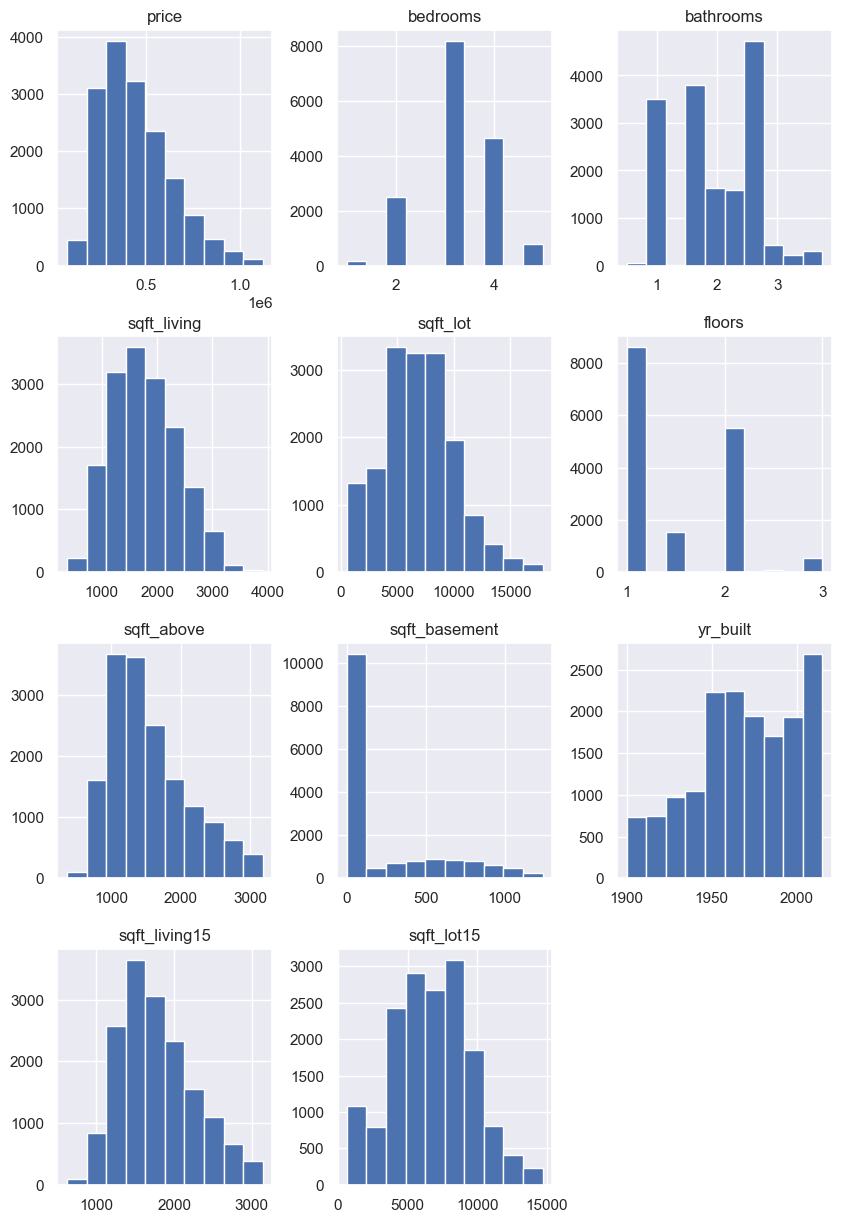

In [64]:
## Plotting the distributions of all the numerical columns in the df_no_mv dataframe
df_no_mv.select_dtypes('number').hist(figsize = (10,15));

There is an improvement from the previous distributions with the extreme outliers removed. Further modifications will be applied as the model is being improved.

### Feature engineering

In [65]:
## Taking a look at the dataframes info
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16266 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           16266 non-null  datetime64[ns]
 1   price          16266 non-null  float64       
 2   bedrooms       16266 non-null  int64         
 3   bathrooms      16266 non-null  float64       
 4   sqft_living    16266 non-null  int64         
 5   sqft_lot       16266 non-null  int64         
 6   floors         16266 non-null  float64       
 7   waterfront     16266 non-null  object        
 8   view           16266 non-null  object        
 9   condition      16266 non-null  object        
 10  grade          16266 non-null  object        
 11  sqft_above     16266 non-null  int64         
 12  sqft_basement  16266 non-null  float64       
 13  yr_built       16266 non-null  int64         
 14  sqft_living15  16266 non-null  int64         
 15  sqft_lot15     1626

Prices of houses may tend to change during different seasons.Converting the datetime column to a column containing the four seasons may help improve the model.

In [66]:
## Taking a look at the date column
df_no_mv['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [67]:
## Creating a dictionary containing seasons
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}
## Adding a seasons column
df_no_mv['Seasons'] = df_no_mv['date'].dt.month.map(seasons)

In [68]:
## Creating a new column without the date column
df_cleaned = df_no_mv.drop('date',axis = 1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16266 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16266 non-null  float64
 1   bedrooms       16266 non-null  int64  
 2   bathrooms      16266 non-null  float64
 3   sqft_living    16266 non-null  int64  
 4   sqft_lot       16266 non-null  int64  
 5   floors         16266 non-null  float64
 6   waterfront     16266 non-null  object 
 7   view           16266 non-null  object 
 8   condition      16266 non-null  object 
 9   grade          16266 non-null  object 
 10  sqft_above     16266 non-null  int64  
 11  sqft_basement  16266 non-null  float64
 12  yr_built       16266 non-null  int64  
 13  sqft_living15  16266 non-null  int64  
 14  sqft_lot15     16266 non-null  int64  
 15  Seasons        16266 non-null  object 
dtypes: float64(4), int64(7), object(5)
memory usage: 2.1+ MB


### Creating Dummy variables

In [125]:
## Checking the names of categorical columns
cat = list(df_cleaned.select_dtypes('object').columns.values)
cat

['waterfront', 'view', 'condition', 'grade', 'Seasons']

In [147]:
## Creating dummies
df_dum = pd.get_dummies(df_cleaned,columns = cat,drop_first = True)
df_dum

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,grade_ Fair,grade_ Good,grade_ Low,grade_ Low Average,grade_ Poor,grade_0 Very Good,grade_1 Excellent,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,1340,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1690,...,0,0,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,2720,...,0,0,0,1,0,0,0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,1360,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,1800,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,1530,...,0,1,0,0,0,0,0,1,0,0
21593,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,1830,...,0,1,0,0,0,0,0,0,0,1
21594,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,1020,...,0,0,0,0,0,0,0,0,1,0
21595,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,1410,...,0,1,0,0,0,0,0,0,0,1


In [148]:
df_dum.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'waterfront_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_ Better', 'grade_ Fair', 'grade_ Good', 'grade_ Low',
       'grade_ Low Average', 'grade_ Poor', 'grade_0 Very Good',
       'grade_1 Excellent', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'], dtype=object)

## Checking the dataset for multicollinearity

Before creating the model it is a good idea to remove features with a high correlation in order to avoid multicollinearity and improve the model

In [149]:
## Creating a crosstab with only the numerical features/inputs (no dummy variables)
dfx = df_cleaned.drop('price',axis = 1)
cross_tab = dfx.select_dtypes('number').corr().abs() > 0.68

In [150]:
## Creating a heat
cross_tab

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,True,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,True
floors,False,False,False,False,True,False,False,False,False,False
sqft_above,False,False,True,False,False,True,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,True,False,False,False,False,False,True,False
sqft_lot15,False,False,False,True,False,False,False,False,False,True


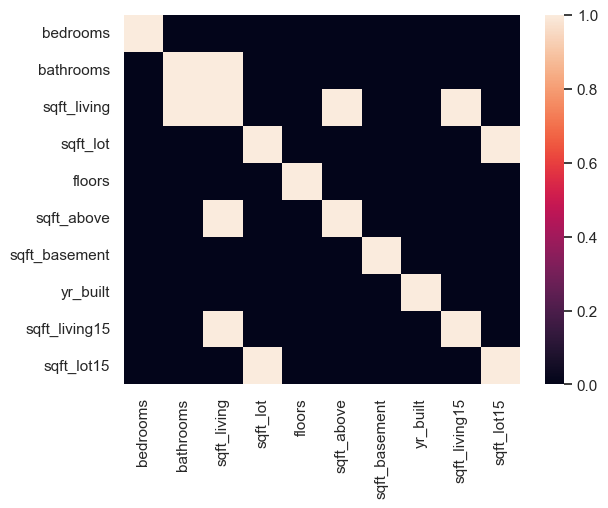

In [151]:
## Creating a heatmap from the crosstab
sns.heatmap(cross_tab);

The squares in white showcase correlations of above 0.68 which is a moderate to strong correlation.
The following columns will be dropped to avoid multicollinearity
`['sqft_lot15','sqft_living15','sqft_above','bathrooms']`

In [156]:
## dropping the listed columns to be used by the model
df_mod = df_dum.drop(['sqft_lot15','sqft_living15','sqft_above','bathrooms'],axis = 1)
df_mod.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'waterfront_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_ Better', 'grade_ Fair', 'grade_ Good', 'grade_ Low',
       'grade_ Low Average', 'grade_ Poor', 'grade_0 Very Good',
       'grade_1 Excellent', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

### Creating a baseline model

In order to create a baseline model we will use the feature with the highest correlation as the independent variable. The r_squared of this model will be compared to note any improvement.

In [157]:
## Checking the correlation with price
df_mod.select_dtypes('number').corr().abs()['price'].sort_values(ascending = False)

price                  1.000000
sqft_living            0.522735
grade_ Better          0.347608
grade_ Low Average     0.274240
sqft_basement          0.238010
floors                 0.237274
grade_ Good            0.232419
bedrooms               0.231898
view_NONE              0.221566
grade_0 Very Good      0.195009
grade_ Fair            0.119351
view_EXCELLENT         0.105199
view_GOOD              0.100060
sqft_lot               0.090113
view_FAIR              0.089287
condition_Very Good    0.088185
condition_Fair         0.068026
waterfront_YES         0.051576
Seasons_Winter         0.049793
yr_built               0.048973
grade_ Low             0.044167
Seasons_Spring         0.043125
grade_1 Excellent      0.042804
condition_Poor         0.028463
Seasons_Summer         0.011320
condition_Good         0.008616
grade_ Poor            0.007607
Name: price, dtype: float64

In [158]:
## Defining the input and target
X_base = df_mod[['sqft_living']]
y = df_mod['price']
## Creating the baseline model
model_base = sm.OLS(endog = y,exog = sm.add_constant(X_base)).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     6115.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:31:40   Log-Likelihood:            -2.1804e+05
No. Observations:               16266   AIC:                         4.361e+05
Df Residuals:                   16264   BIC:                         4.361e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.499e+05   3973.062     37.724      0.000    1.42e+05    1.58e+05
sqft_living   165.3909      2.115     78.199      0.000     161.245     169.537
==============================================================================
Omnibus:                      973.233   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.597
Skew:                           0.640   Prob(JB):                    1.92e-251
Kurtosis:                       3.258   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The baseline model explains only 27% of the variance in price
* An increase in the living space by one square foot results in an increase in price by about $165 

### Creating a multiple linear regression model

#### Model_1

In [161]:
## Defining the input and targets
X = df_mod.drop('price',axis = 1)
y = df_mod['price']
## Creating the baseline model
model_1 = sm.OLS(endog = y,exog = sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     706.1
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:46:21   Log-Likelihood:            -2.1448e+05
No. Observations:               16266   AIC:                         4.290e+05
Df Residuals:                   16239   BIC:                         4.292e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.142e+06   8.57e+04     59.984      0.000    4.97e+06    5.31e+06
bedrooms            -1.337e+04   1667.700     -8.017      0.000   -1.66e+04   -1.01e+04
sqft_living           109.2916      3.132     34.900      0.000     103.153     115.430
sqft_lot               -8.1904      0.393    -20.817      0.000      -8.962      -7.419
floors                2.66e+04   2896.407      9.183      0.000    2.09e+04    3.23e+04
sqft_basement          23.3202      3.832      6.086      0.000      15.809      30.831
yr_built            -2460.3605     44.353    -55.472      0.000   -2547.298   -2373.423
waterfront_YES       1.429e+05   3.73e+04      3.831      0.000    6.98e+04    2.16e+05
view_EXCELLENT       1.061e+05   1.95e+04      5.445      0.000    6.79e+04    1.44e+05
view_FAIR            2.025e+04   1.08e+04      1.871      0.061    -969.900    4.15e+04
view_GOOD            9383.1550   1.12e+04      0.838      0.402   -1.26e+04    3.13e+04
view_NONE           -5.371e+04   5803.598     -9.255      0.000   -6.51e+04   -4.23e+04
condition_Fair      -3.811e+04   1.18e+04     -3.232      0.001   -6.12e+04    -1.5e+04
condition_Good       1.737e+04   2531.178      6.861      0.000    1.24e+04    2.23e+04
condition_Poor      -4.614e+04   3.07e+04     -1.504      0.133   -1.06e+05     1.4e+04
condition_Very Good  4.443e+04   4004.568     11.096      0.000    3.66e+04    5.23e+04
grade_ Better        2.271e+05   4620.673     49.142      0.000    2.18e+05    2.36e+05
grade_ Fair         -1.624e+05   9864.635    -16.463      0.000   -1.82e+05   -1.43e+05
grade_ Good          1.049e+05   2743.273     38.227      0.000    9.95e+04     1.1e+05
grade_ Low          -1.749e+05   3.07e+04     -5.705      0.000   -2.35e+05   -1.15e+05
grade_ Low Average  -9.921e+04   3613.007    -27.459      0.000   -1.06e+05   -9.21e+04
grade_ Poor         -1.084e+05   1.29e+05     -0.839      0.402   -3.62e+05    1.45e+05
grade_0 Very Good    3.315e+05   9820.899     33.750      0.000    3.12e+05    3.51e+05
grade_1 Excellent    4.313e+05   5.79e+04      7.449      0.000    3.18e+05    5.45e+05
Seasons_Spring       2.242e+04   2782.479      8.059      0.000     1.7e+04    2.79e+04
Seasons_Summer       5804.8806   2811.291      2.065      0.039     294.442    1.13e+04
Seasons_Winter      -2363.2121   3212.359     -0.736      0.462   -8659.790    3933.366
==============================================================================
Omnibus:                      907.366   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1393.122
Skew:                           0.479   Prob(JB):                    3.07e-303
Kurtosis:                       4.066   Cond. No.                     1.02e+06
================================================

* The model explains 53% of the variance in price. This is a great improvement from the baseline model.
* The inputs will be standardized in order to determine the weights and hence tell the magnitude of their impact.

### Standardizing the inputs

In [164]:
## Importing the relevant packages
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [169]:
### standardizing the inputs
std_scl = StandardScaler()
lr = LinearRegression()
x_scaled = std_scl.fit_transform(X)
model_2 = lr.fit(x_scaled,y)
weights = pd.DataFrame()
weights['inputs'] = X.columns
weights['weight'] = model_2.coef_
weights.sort_values(by = 'weight',ascending = True)

,inputs,weight
5,yr_built,-74111.826064
19,grade_ Low Average,-31318.705597
2,sqft_lot,-26242.813376
16,grade_ Fair,-17220.805028
10,view_NONE,-12689.199202
0,bedrooms,-10614.908576
18,grade_ Low,-5813.943416
11,condition_Fair,-3314.396545
13,condition_Poor,-1534.100147
25,Seasons_Winter,-892.239947


### Calculating the VIF